# Analyses op het DWH met pandas

## Vraag 1: Hoe veel plaatsen zijn er nog over op het moment van vertrek?

In [45]:
import pandas as pd
import mysql.connector as msql
from mysql.connector import Error
from datetime import date, timedelta
import warnings

warnings.filterwarnings('ignore')
try:
    conn = msql.connect(host='localhost', database='airfaresdwh', user='root', password='wachtwoord')#give ur username, password

    query = """SELECT SeatsAvailable AS 'Seats Remaining', COUNT(SeatsAvailable) AS 'Total' FROM FactFlights ff
	JOIN DimAirline da ON ff.AirlineKey = da.AirlineKey
	JOIN DimAirport da1 ON ff.DepartureAirportKey = da1.AirportKey
    JOIN DimAirport da2 ON ff.ArrivalAirportKey = da2.AirportKey
    JOIN DimFlight df ON ff.FlightKey = df.FlightKey
    JOIN DimDate dd1 ON ff.ScrapeDateKey = dd1.DateKey
    JOIN DimDate dd2 ON ff.DepartureDateKey = dd2.DateKey
    JOIN DimDate dd3 ON ff.ArrivalDateKey = dd3.DateKey
    WHERE (dd2.FullDate = date_add(dd1.FullDate, INTERVAL 1 DAY)) AND AirlineName LIKE 'TUI fly'
    GROUP BY SeatsAvailable
    ORDER BY 1 DESC;"""
    df = pd.read_sql(query,conn)
    print(df.head(20))
    conn.close() # close the connection
except Exception as e:
    conn.close()
    print(str(e))

# De dataframe die we krijgen

  Seats Remaining  Total
0               9     25
1               8      6
2               7     12
3               6     26
4               5      5
5               4     28
6               3     41
7               2     51
8               1     67
9              -1    192


In [46]:
df.loc[df["Seats Remaining"] == "-1", "Seats Remaining"] = "10+"
df

,Seats Remaining,Total
0,9,25
1,8,6
2,7,12
3,6,26
4,5,5
5,4,28
6,3,41
7,2,51
8,1,67
9,10+,192


<Axes: title={'center': 'Aantal stoeltjes nog beschikbaar één dag voor vertrek'}, ylabel='Total'>

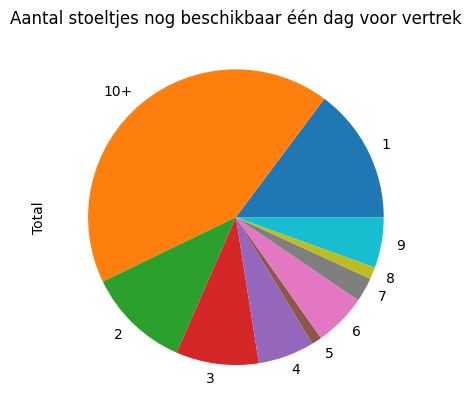

In [47]:
# Pie plot of the initial df

df.groupby(['Seats Remaining']).sum().plot(kind='pie', y='Total', legend=False, 
                                            title="Aantal stoeltjes nog beschikbaar één dag voor vertrek")

In [48]:
# Second dataframe to make it more clear
data = ["10+", df["Total"].head(9).sum()], ["Less than 10", df["Total"].tail(1).sum()]
df2 = pd.DataFrame(data, columns=["Legend", "Amount"])
df2

,Legend,Amount
0,10+,261
1,Less than 10,192


<Axes: title={'center': 'Aantal stoeltjes nog beschikbaar één dag voor vertrek (%)'}, ylabel='Amount'>

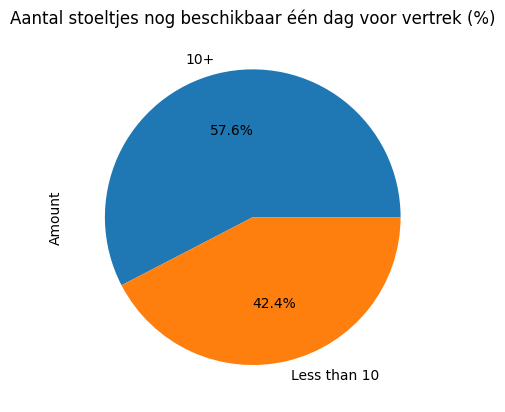

In [49]:
# Pie plot of the second df
df2.groupby(['Legend']).sum().plot(kind='pie', y='Amount', legend=False, autopct='%1.1f%%',
                                    title="Aantal stoeltjes nog beschikbaar één dag voor vertrek (%)")